Team Members :
1. Akshay Raju Magre : EE19BTECH11002
2. Tushar Sanju More : EE19BTECH11025
3. Aaditya Khedekar : EE19BTECH11027

**Music Genre Classification**

In [ ]:
#importing required datasets
from google.colab import drive
drive.mount('/content/drive')

data_location1='/content/drive/My Drive/project/Data/genre_classification/'
data_location2='/content/drive/My Drive/project/data_10.json'
data_location3='/content/drive/My Drive/project/voice.csv'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Input_shape (216, 13)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 216, 64)           19968     
                                                                 
 lstm_11 (LSTM)              (None, 64)                33024     
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 57,802
Trainable params: 57,802
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
72/72 [==========

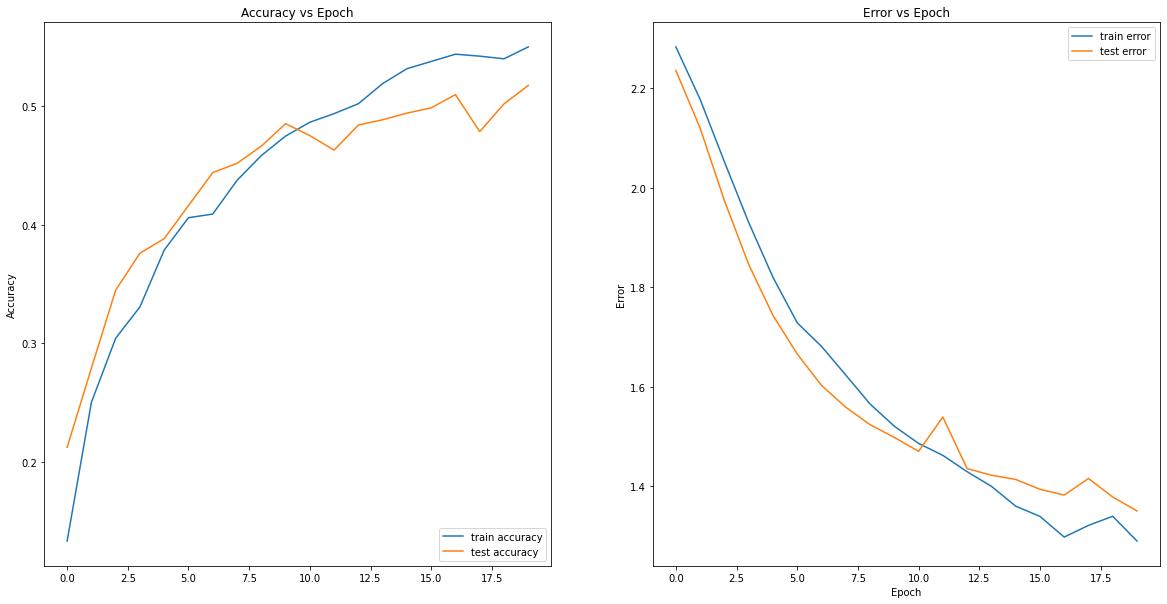

47/47 - 1s - loss: 1.3768 - accuracy: 0.5267 - 1s/epoch - 32ms/step

Test accuracy: 52.670228481292725


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from  tensorflow import keras
import json
from sklearn.model_selection import train_test_split

# Loads data and splits it into training, testing and validation sets.
def all_datasets(test_size,validation_size,path):
    # load data
    with open(path, "r") as f:
      data = json.load(f)
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)
    return X_train, X_validation, X_test, y_train, y_validation, y_test

# Generates RNN-LSTM model
def train_model(input_shape,X_train,y_train,X_validation,y_validation,batch_size=50, epochs=20):

    model = keras.Sequential()

    # 2 LSTM layers
    model.add(keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(keras.layers.LSTM(64))

    # dense layer
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    # optimisng stage using Adam optimiser
    Adam_optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=Adam_optimiser,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    model.summary()

    #training model
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=50, epochs=20)

    return model, history

path = data_location2
X_train, X_validation, X_test, y_train, y_validation, y_test = all_datasets(0.25, 0.2, path)

# Get shape of Input
input_shape = (X_train.shape[1], X_train.shape[2]) # 130/216, 13
print("Input_shape",input_shape)

# train model
model, history = train_model(input_shape,X_train,y_train,X_validation,y_validation,batch_size=50, epochs=20)

# plot accuracy and error plots for training and validation
fig, ax = plt.subplots(1,2,figsize=(20,10))

ax[0].plot(history.history["accuracy"], label="train accuracy")
ax[0].plot(history.history["val_accuracy"], label="test accuracy")
ax[0].set_ylabel("Accuracy")
ax[0].legend(loc="lower right")
ax[0].set_title("Accuracy vs Epoch")

ax[1].plot(history.history["loss"], label="train error")
ax[1].plot(history.history["val_loss"], label="test error")
ax[1].set_ylabel("Error")
ax[1].set_xlabel("Epoch")
ax[1].legend(loc="upper right")
ax[1].set_title("Error vs Epoch")
plt.show()

# evaluate model on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
y_pred = model.predict(X_test)
print('\nTest accuracy:', test_accuracy*100)

In [ ]:
# Labels
# string"hiphop": 0
# string"blues": 1
# string"rock": 2
# string"disco": 3
# string"jazz": 4
# string"classical": 5
# string"reggae": 6
# string"country": 7
# string"metal": 8
# string"pop": 9

[[ 62.   8.   3.  29.   0.   2.  18.   4.  13.  17.]
 [  4.  55.  11.  15.  23.   1.  12.  20.  12.   0.]
 [  6.  14.  41.  33.   8.   1.  18.  15.   9.   4.]
 [ 18.   6.  13.  75.   0.   2.   9.   3.   4.   9.]
 [  1.  12.   3.   2.  99.  25.  13.  21.   0.   0.]
 [  0.   0.   7.   1.   5. 134.   0.   1.   0.   1.]
 [ 33.   7.   1.  16.   7.   1.  69.  11.   5.   3.]
 [  1.  11.  31.   6.  19.   5.  18.  41.   1.   2.]
 [  4.  12.   8.   4.   0.   0.   5.   0. 106.   0.]
 [  8.   1.   2.  11.   3.   2.   5.  10.   0. 107.]]


Text(0.5, 1.05, 'CONFUSION MATRIX')

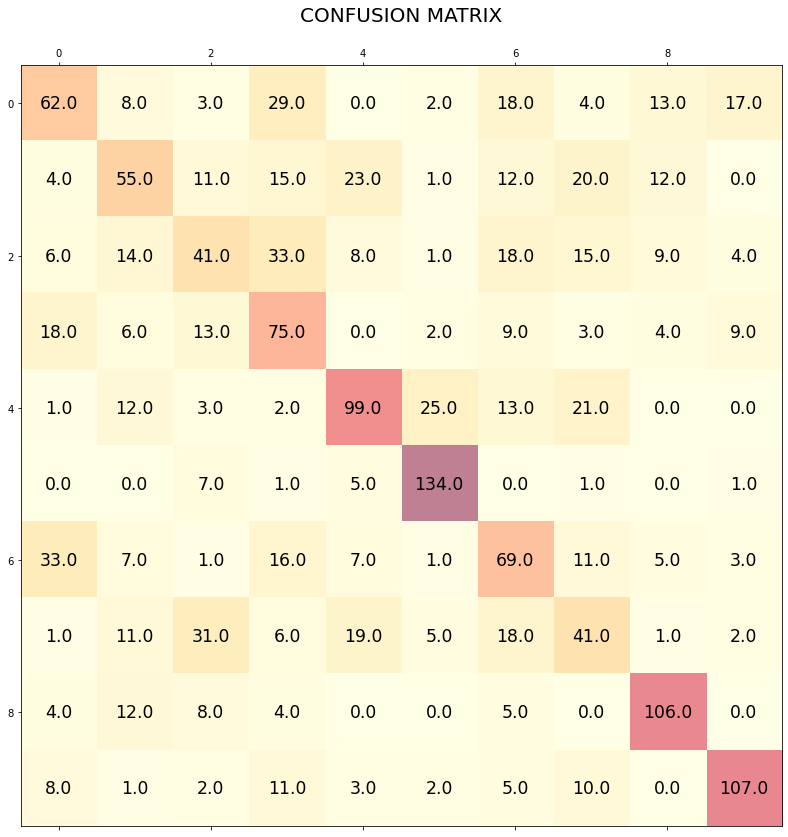

In [ ]:
conf_mat = np.zeros((10,10))
for idx,i in enumerate(range(len(y_pred))):
  conf_mat[y_test[idx],np.argmax(y_pred[idx])] += 1
print(conf_mat)

fig, px = plt.subplots(figsize=(20, 14))
px.matshow(conf_mat, cmap=plt.cm.YlOrRd, alpha=0.5)
for i1 in range(conf_mat.shape[0]):
  for j1 in range(conf_mat.shape[1]):
    px.text(x=j1,y=i1,s=conf_mat[i1, j1], va='center', ha='center', size='xx-large')
px.set_title("CONFUSION MATRIX", fontsize = 20)


**Gender Identification using Voice Data**

In [ ]:
import csv
file = open(data_location3)
csvreader = csv.reader(file)
header = next(csvreader)
print(np.array(header).T)
rows = []
for row in csvreader:
    rows.append(row)

file.close()

['meanfreq' 'sd' 'median' 'Q25' 'Q75' 'IQR' 'skew' 'kurt' 'sp.ent' 'sfm'
 'mode' 'centroid' 'meanfun' 'minfun' 'maxfun' 'meandom' 'mindom' 'maxdom'
 'dfrange' 'modindx' 'label']


In [ ]:
voice_data = np.array(rows)
voice_label = voice_data[:,-1]
voice_label[voice_label == 'female'] = 1
voice_label[voice_label == 'male'] = 0
voice_label = voice_label.astype(int)
voice_data = voice_data[:,:-1]

voice_data[voice_data == ''] = 0.0
voice_data = voice_data.astype(float)


xtr, xts, ytr, yts = train_test_split(voice_data, voice_label, test_size=len(voice_data)//3)


In [ ]:
voice_data.shape

(3168, 20)

In [ ]:
voice_label.shape

(3168,)

In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

from keras.datasets import mnist


In [ ]:
## Defining Important functions:

def relu(x, deriv = False):
  if(deriv == True):
    x_d = np.zeros((x.shape[0],x.shape[1]))
    x_d[x>0] = 1
    return x_d
  return np.maximum(0,x)

def softmax(x):
  x -= np.max(x)
  return (np.exp(x).T / np.sum(np.exp(x),axis=1)).T

def tanh(x, deriv = False):
  if(deriv == True):
    return 1-np.tanh(x)**2
  return np.tanh(x)

def leakyrelu(x, deriv = False):
  if(deriv == True):
    x_d = np.ones_like(x)
    x_d[x<0] = 0.01
    return x_d
  return np.maximum(0.1*x,x)

def sigmoid(x ,deriv = False):
  ee = 1/1+np.exp(-x)
  if(deriv == True):
    return ee * (1-ee)
  return ee

def one_hot(x):
  x_encoded = np.zeros((x.shape[0],10))
  x_encoded[np.arange(x.shape[0]),x.reshape(x.shape[0])] = 1
  return x_encoded

def accuracy(t_pred, y):
    ac = (np.sum(np.argmax(t_pred,axis=1) == np.argmax(y,axis=1))/y.shape[0])
    return ac*100

def activation_func(x,act_type,deriv=False):
  if(act_type == 'relu'):
    return relu(x,deriv)
  elif(act_type == 'sigmoid'):
    return sigmoid(x,deriv)
  elif(act_type == 'tanh'):
    return tanh(x,deriv)
  elif(act_type == 'leakyrelu'):
    return leakyrelu(x,deriv)

Streaming output truncated to the last 5000 lines.
Epoch = 46//500 :: Batch number 7 :: Accuracy ==> 59.0
Epoch = 46//500 :: Batch number 8 :: Accuracy ==> 54.50000000000001
Epoch = 46//500 :: Batch number 9 :: Accuracy ==> 53.0
Epoch = 46//500 :: Batch number 10 :: Accuracy ==> 56.99999999999999
Final Acurracy at the end of epoch 46 ==> 56.99999999999999
Epoch = 47//500 :: Batch number 1 :: Accuracy ==> 60.5
Epoch = 47//500 :: Batch number 2 :: Accuracy ==> 49.0
Epoch = 47//500 :: Batch number 3 :: Accuracy ==> 50.0
Epoch = 47//500 :: Batch number 4 :: Accuracy ==> 54.0
Epoch = 47//500 :: Batch number 5 :: Accuracy ==> 49.0
Epoch = 47//500 :: Batch number 6 :: Accuracy ==> 49.0
Epoch = 47//500 :: Batch number 7 :: Accuracy ==> 50.0
Epoch = 47//500 :: Batch number 8 :: Accuracy ==> 51.0
Epoch = 47//500 :: Batch number 9 :: Accuracy ==> 51.5
Epoch = 47//500 :: Batch number 10 :: Accuracy ==> 46.0
Final Acurracy at the end of epoch 47 ==> 46.0
Epoch = 48//500 :: Batch number 1 :: Accurac

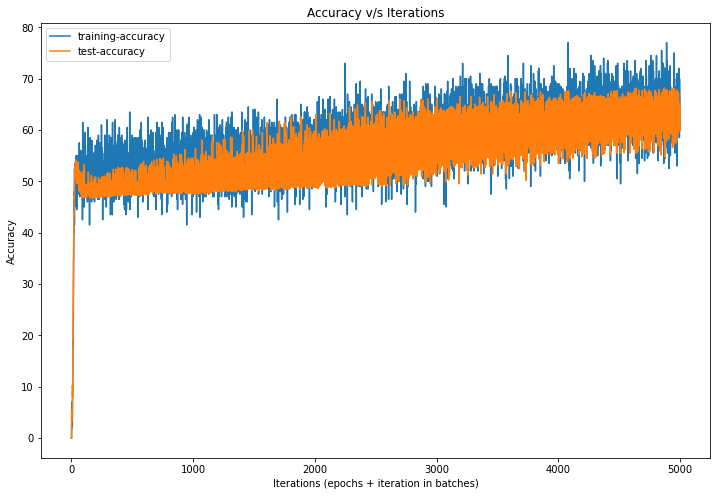

In [ ]:
##################################################
#Load MNIST data.
##################################################

x_train=xtr
x_test=xts
y_train=ytr 
y_test=yts
#x_train = x_train.reshape((x_train.shape[0],x_train.shape[1]*x_train.shape[2]))
#x_test = x_test.reshape((x_test.shape[0],x_test.shape[1]*x_test.shape[2]))

#Normalizing 
#x_train = (x_train/(255 * 0.99)) + 0.01
#x_test = (x_test/(255 * 0.99)) + 0.01



print("X_train shape", x_train.shape)
print("X_test shape", x_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

##################################################
#Build the architecture
##################################################

## Defining the weights and bias
N_in = x_train.shape[1]
L1 = 64
L2 = 64
L3 = 64
N_out = 10

W1 = np.random.normal(0,N_in**(-0.5),[N_in,L1])
W2 = np.random.normal(0,L1**(-0.5),[L1,L2])
W3 = np.random.normal(0,L2**(-0.5),[L2,L3])
W4 = np.random.normal(0,L3**(-0.5),[L3,N_out])

B1 = np.random.normal(0,N_in**(-0.5),[1,L1])
B2 = np.random.normal(0,L1**(-0.5),[1,L2])
B3 = np.random.normal(0,L2**(-0.5),[1,L3])
B4 = np.random.normal(0,L3**(-0.5),[1,N_out])

WB = [W1,W2,W3,W4,B1,B2,B3,B4] 

##################################################
#Train the network
##################################################

def train(x_train,y_train,WB,lr,activation,backpropagation = True):

  w1,w2,w3,w4,b1,b2,b3,b4 = WB

  ## Forward Propagation
  a1 = x_train@w1 + b1
  z1 = relu(a1)

  a2 = z1@w2 + b2
  z2 = relu(a2)

  a3 = z2@w3 + b3
  z3 = relu(a3)

  out_pred = softmax(z3@w4 + b4)

  if(backpropagation == False):
    return out_pred

  ## Backward Propagation
  y_train = np.eye(10)[y_train]
  e4_del = (y_train - out_pred)

  e3_err = e4_del@w4.T
  e3_del = e3_err * activation_func(z3, act_type=activation, deriv = True)

  e2_err = e3_del@w3.T
  e2_del = e2_err * activation_func(z2, act_type=activation, deriv = True)

  e1_err = e2_del@w2.T
  e1_del = e1_err * activation_func(z1, act_type=activation, deriv = True)

  lr = -lr/x_train.shape[0]

  ## Updates
  w4 -= lr * (z3.T@e4_del)
  b4 -= lr * (e4_del.sum(axis=0))

  w3 -= lr * (z2.T@e3_del)
  b3 -= lr * (e3_del.sum(axis=0))

  w2 -= lr * (z1.T@e2_del)
  b2 -= lr * (e2_del.sum(axis=0))

  w1 -= lr * (x_train.T@e1_del)
  b1 -= lr * (e1_del.sum(axis=0))

  WB = [w1,w2,w3,w4,b1,b2,b3,b4]
  return WB,out_pred


def SGD(x_train, y_train, x_tst, y_tst, epochs, nbatch, WB, lr, activation, prt = True):
    
  rand_idx = np.arange(x_train.shape[0])
  acc_vec = []
  test_acc = []
  for epch in range(epochs):
    np.random.shuffle(rand_idx)
    iters = x_train.shape[0]//nbatch

    for i in range(iters):
      start = i*nbatch
      end = start+nbatch
            
      if(end > (x_train.shape[0] - 1)):
        end = x_train.shape[0]

      x_bat = x_train[rand_idx[start:end]]
      y_bat = y_train[rand_idx[start:end]]

      WB, t_pred = train(x_bat,y_bat,WB,lr,activation)

      y_bat = one_hot(y_bat) 

      y_test_pred = train(x_tst,y_tst,WB,lr,activation,backpropagation = False)

      test_ac = accuracy(y_test_pred,one_hot(y_test))

      # y_test_pr = train(x_tst,y_tst,W,lr,activation,backpropagation = False)


      acc = accuracy(y_bat, t_pred)

      test_acc.append(test_ac)
      acc_vec.append(acc)
      if(prt == True):
        print(f"Epoch = {epch+1}//{epochs} :: Batch number {i+1} :: Accuracy ==> {acc}")
            

      
    print(f"Final Acurracy at the end of epoch {epch+1} ==> {acc}")
            
            

  [w1,w2,w3,w4,b1,b2,b3,b4]  = WB
  WB_final = [w1.copy(),w2.copy(),w3.copy(),w4.copy(),b1.copy(),b2.copy(),b3.copy(),b4.copy()]

  return WB_final, acc, acc_vec, test_acc

lr = 0.0006
epochs = 500
nbatchs = 200
activation = 'relu'
W_final, ac, acc_vec, test_acc1 = SGD(x_train,y_train,x_test,y_test,epochs,nbatchs,WB,lr,activation)



##################################################
#Test the network and write down the performance
##################################################

y_test_pred = train(x_test,y_test,W_final,lr,activation,backpropagation = False)

test_acc = accuracy(y_test_pred,one_hot(y_test))
print(f"Testing Accuracy : {test_acc}")


plt.figure(figsize=(12,8))
plt.title("Accuracy v/s Iterations")
plt.plot(np.arange(len(acc_vec)),acc_vec, label = 'training-accuracy')
plt.plot(np.arange(len(test_acc1)),test_acc1, label = 'test-accuracy')
plt.xlabel('Iterations (epochs + iteration in batches)')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [ ]:
def Perceptron(X_train, Y_train, X_test, Y_test):
  iterations = 1e3
  iterations = int(iterations)
  accuracy_vec = np.zeros(iterations)
  w_init = np.zeros(X_train.shape[1])
  wo = 0
  n_rate = 0.5

  for itr in range(iterations):
    for idx, xi in enumerate(X_train):
      Y_pred = xi@w_init + wo
      Y_pred = np.where(Y_pred>=0, 1, 0)

      update = n_rate*(Y_train[idx] - Y_pred)
      w_init += update*xi
      wo += update

    Y_pred_test = X_test@w_init + wo
    Y_pred_test = np.where(Y_pred_test>=0, 1, 0)
    accuracy_vec[itr] = np.sum(Y_pred_test==Y_test) / Y_pred_test.shape

  Y_pred_test = X_test@w_init + wo
  Y_pred_test = np.where(Y_pred_test>=0, 1, 0)
  accuracy = np.sum(Y_pred_test==Y_test) / Y_pred_test.shape

  return Y_pred_test, accuracy_vec, w_init, wo


y_pred_perceptron, perceptron_acc, w_perc, wo_perc = Perceptron(x_train,y_train,x_test, y_test)
print(f"Classification accuracy by perceptron : {100*np.sum(y_pred_perceptron == y_test)/len(y_test)}")

Classification accuracy by perceptron : 48.484848484848484


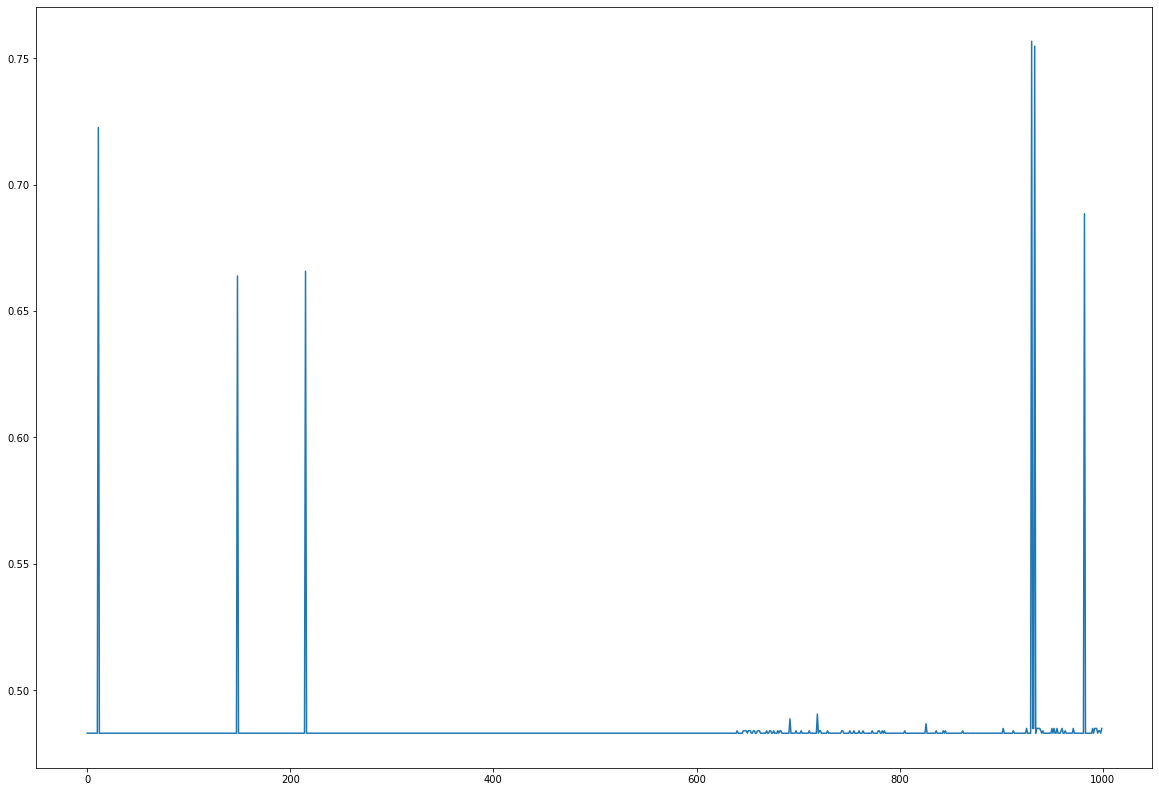

In [ ]:
plt.figure(figsize = (20,14))
plt.plot(np.arange(len(perceptron_acc)),perceptron_acc)

In [ ]:
# "Support Vector Classifier"
from sklearn.svm import SVC 
svm_model = SVC(kernel='linear')
 
# fitting x samples and y classes
svm_model.fit(x_train, y_train)

y_pred_svm = svm_model.predict(x_test)
print(f"Classification accuracy by SVM : {(np.sum(y_pred_svm == y_test)/len(y_test))*100}")

Classification accuracy by SVM : 90.53030303030303
